In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

#결측치 확인 및 제거
df.duplicated().sum()
df.isnull().sum()

df = df.dropna(axis=0)

df.Year = df.Year.astype('int64')

#출고량 단위가 1,000,000단위로 K는 0.001, M은 1을 곱함
df1 = df.copy()
df1['NA_Sales']=df1['NA_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)
df1['EU_Sales']=df1['EU_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)
df1['JP_Sales']=df1['JP_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)
df1['Other_Sales']=df1['Other_Sales'].replace({"K": "*1e-3","M":"*1"}, regex=True).map(pd.eval).astype(float)

#'Unnamed: 0', 'Platform', 'Publisher' Column 삭제
df2 = df1.copy()
df2.drop(labels=['Unnamed: 0', 'Platform', 'Publisher'], axis=1, inplace=True)

# **지역에 따라서 선호하는 게임 장르가 다를까?**

In [3]:
#Name, Year Column 삭제
df3 = df2.copy()
df3.drop(labels=['Name', 'Year'], axis=1, inplace=True)

In [4]:
df_genre = df3.groupby(['Genre']).sum()

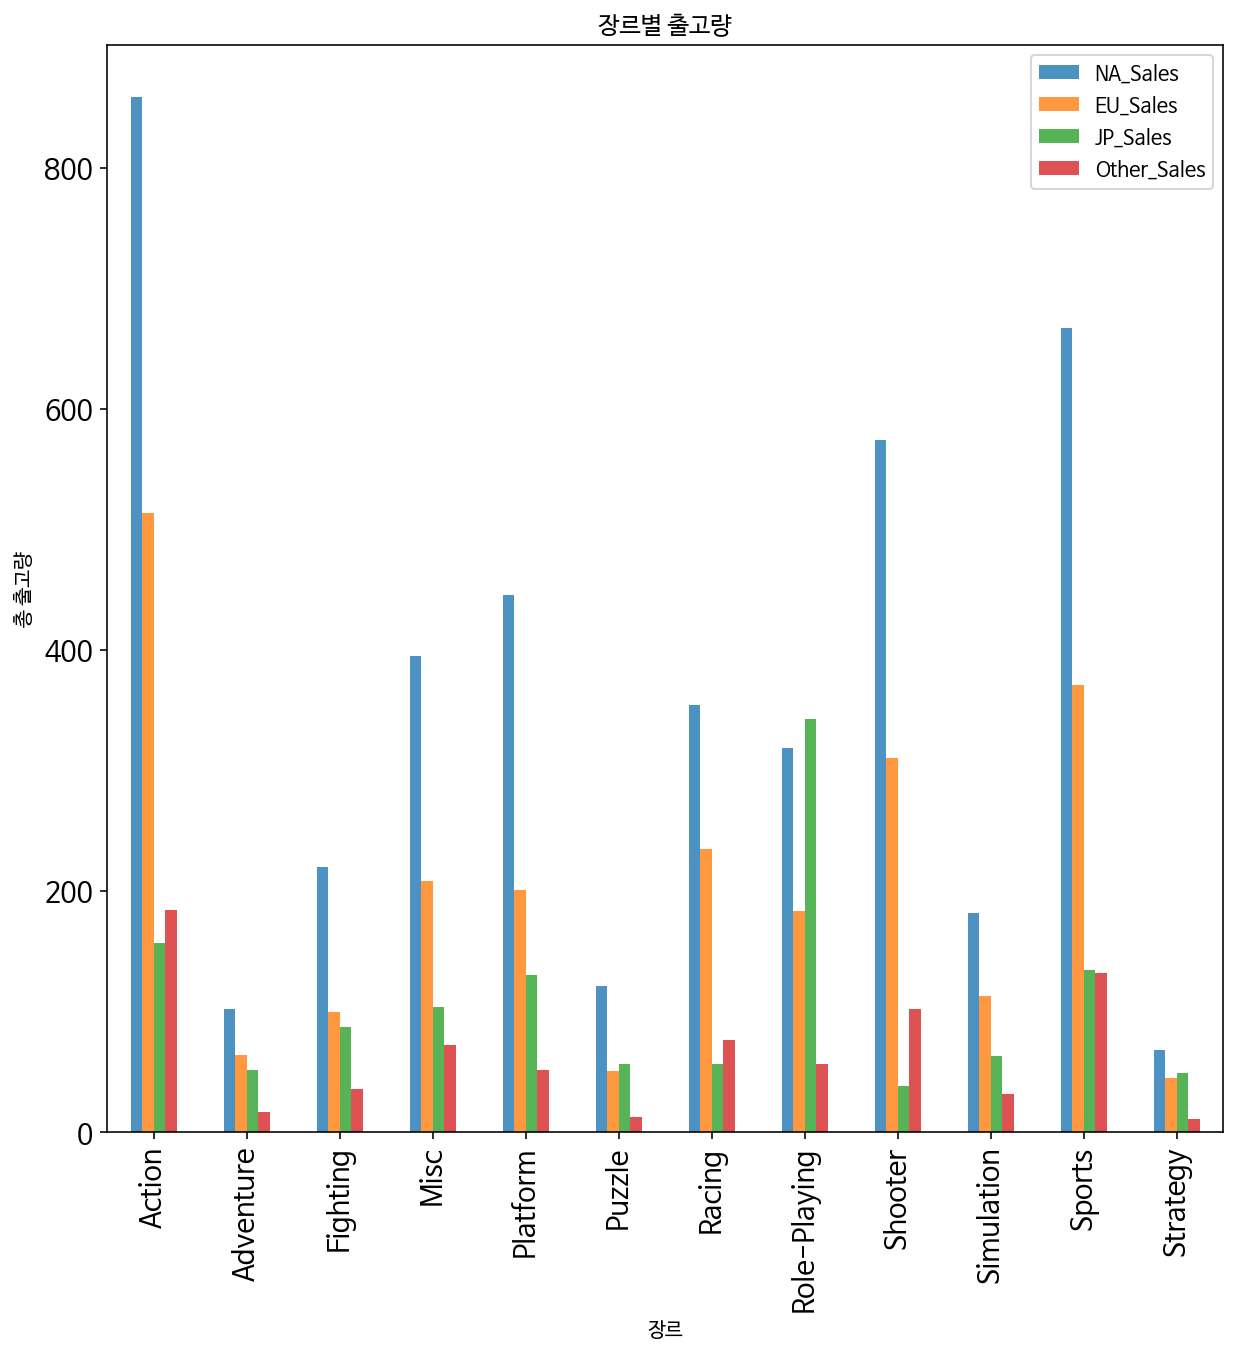

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('font', family='NanumBarunGothic')
df_genre_plot = df_genre.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].mean()
df_genre_plot.plot(kind='bar', fontsize=14, alpha=0.8, figsize=(10,10), title='장르별 출고량', 
                   xlabel='장르', ylabel='총 출고량');

북미지역의 출고량이 다른지역의 출고량보다 높다.  
두번째로 유럽지역이 높다.  
Action, Sports, Shooter순으로 출고량이 높지만,  
일본지역에서만큼은 Role-Playing, Action, Sports, Platform순으로 출고량이 높다.  

# **연도별 게임의 트렌드가 있을까?**

In [6]:
#Name, Genre 삭제
df4 = df2.copy()
df4.drop(labels=['Name', 'Genre'], axis=1, inplace=True)

df5 = df4[(df4['Year']>=1900)]
df_year = df5.groupby(['Year']).sum()

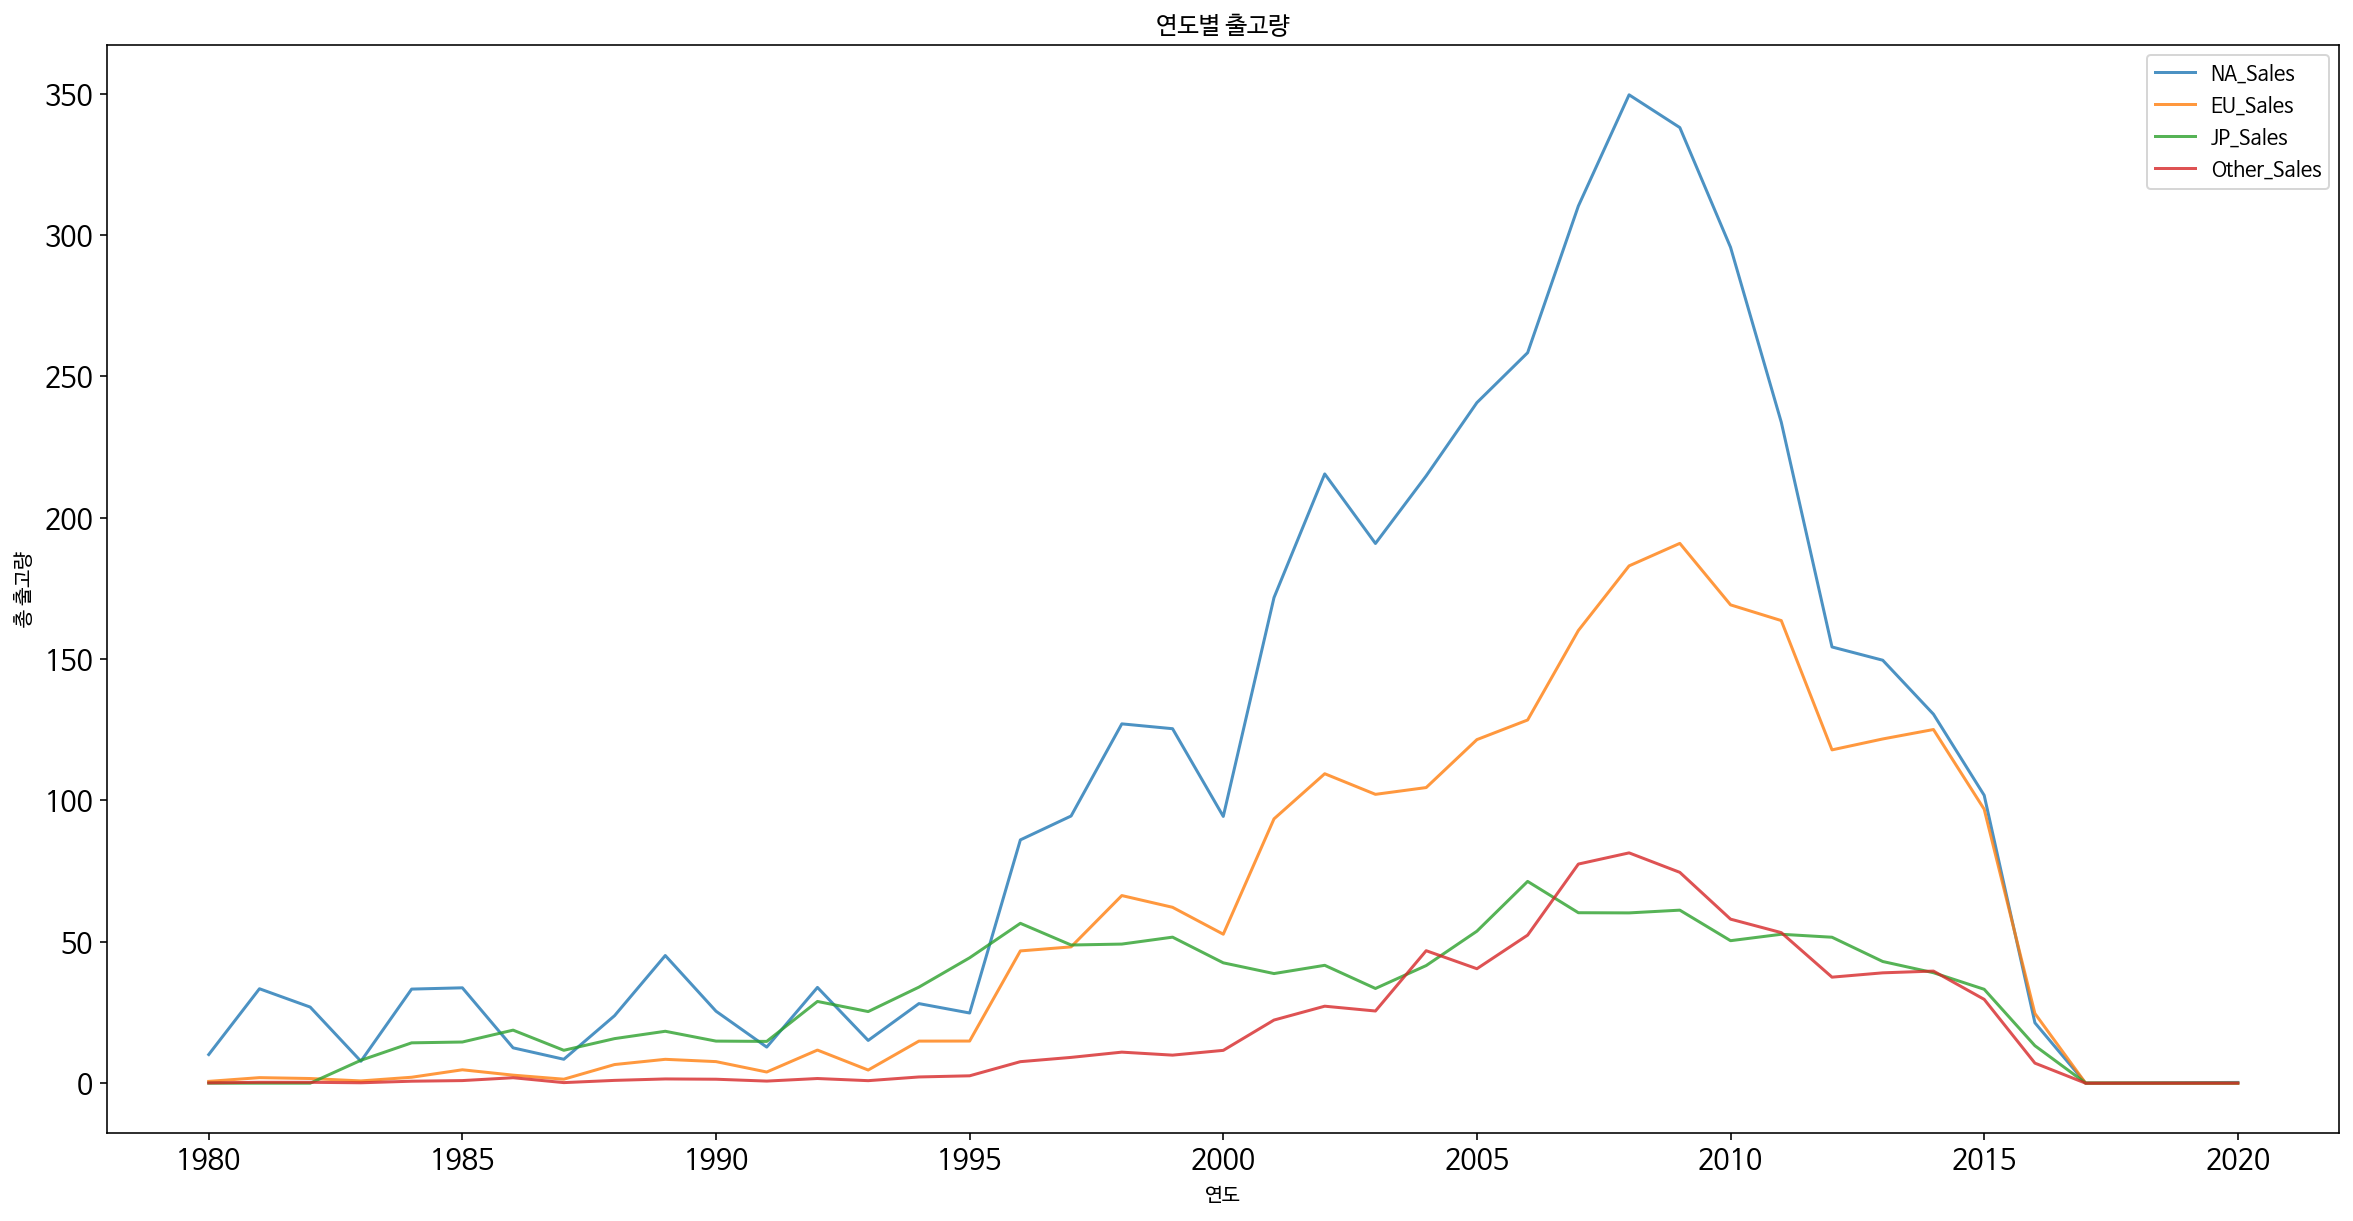

In [7]:
df_year_plot = df_year.groupby(['Year'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].mean()
df_year_plot.plot(fontsize=14, alpha=0.8, figsize=(20,10), title='연도별 출고량', 
                   xlabel='연도', ylabel='총 출고량');

   북미지역의 출고량은 압도적으로 높다.  
   1997년을 기점으로 유럽과 일본의 순위가 바뀐다.  
   2004년을 기점으로 일본과 기타지역의 순위도 변동이 발생 된다.


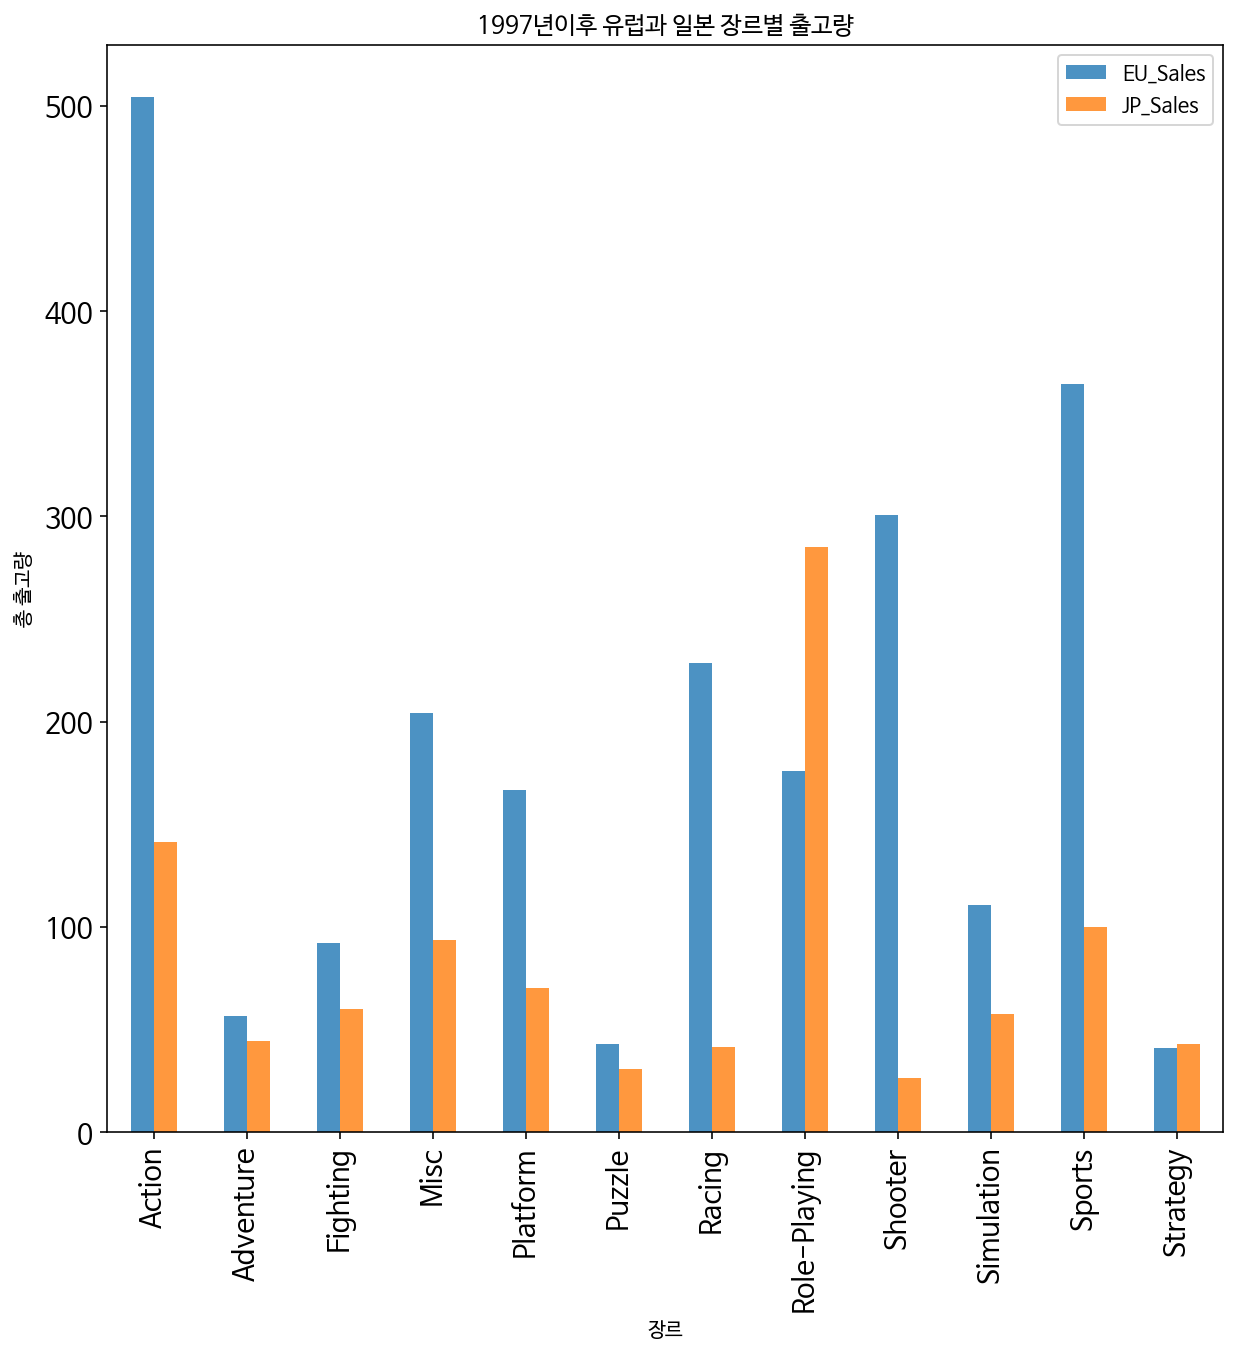

In [8]:
#1997년이후 유럽과 일본 장르별 출고량
df_eu_jp = df2.copy()
df_eu_jp.drop(labels=['NA_Sales', 'Other_Sales'], axis=1, inplace=True)
df_eu_jp1 = df_eu_jp[(df_eu_jp['Year']>=1996)]
df_eu_jp1.drop(labels=['Year'], axis=1, inplace=True)
df_eu_jp2 = df_eu_jp1.groupby(['Genre']).sum()

#df_eu_jp2.plot(fontsize=14, alpha=0.8, figsize=(20,10), title='1997년 유럽과 일본 장르별 출고량', 
 #                  xlabel='연도', ylabel='총 출고량');

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('font', family='NanumBarunGothic') 
df_eu_jp2.plot(kind='bar', fontsize=14, alpha=0.8, figsize=(10,10), title='1997년이후 유럽과 일본 장르별 출고량', 
                   xlabel='장르', ylabel='총 출고량');

## 1997년이후 유럽과 일본 장르별 출고량  
   유럽의 출고량  
   1위 Action, 2위 Sports, 3위 Shooter  
   일본의 출고량  
   1위 Role-Playing, 2위 Action, 3위 Sports  
   

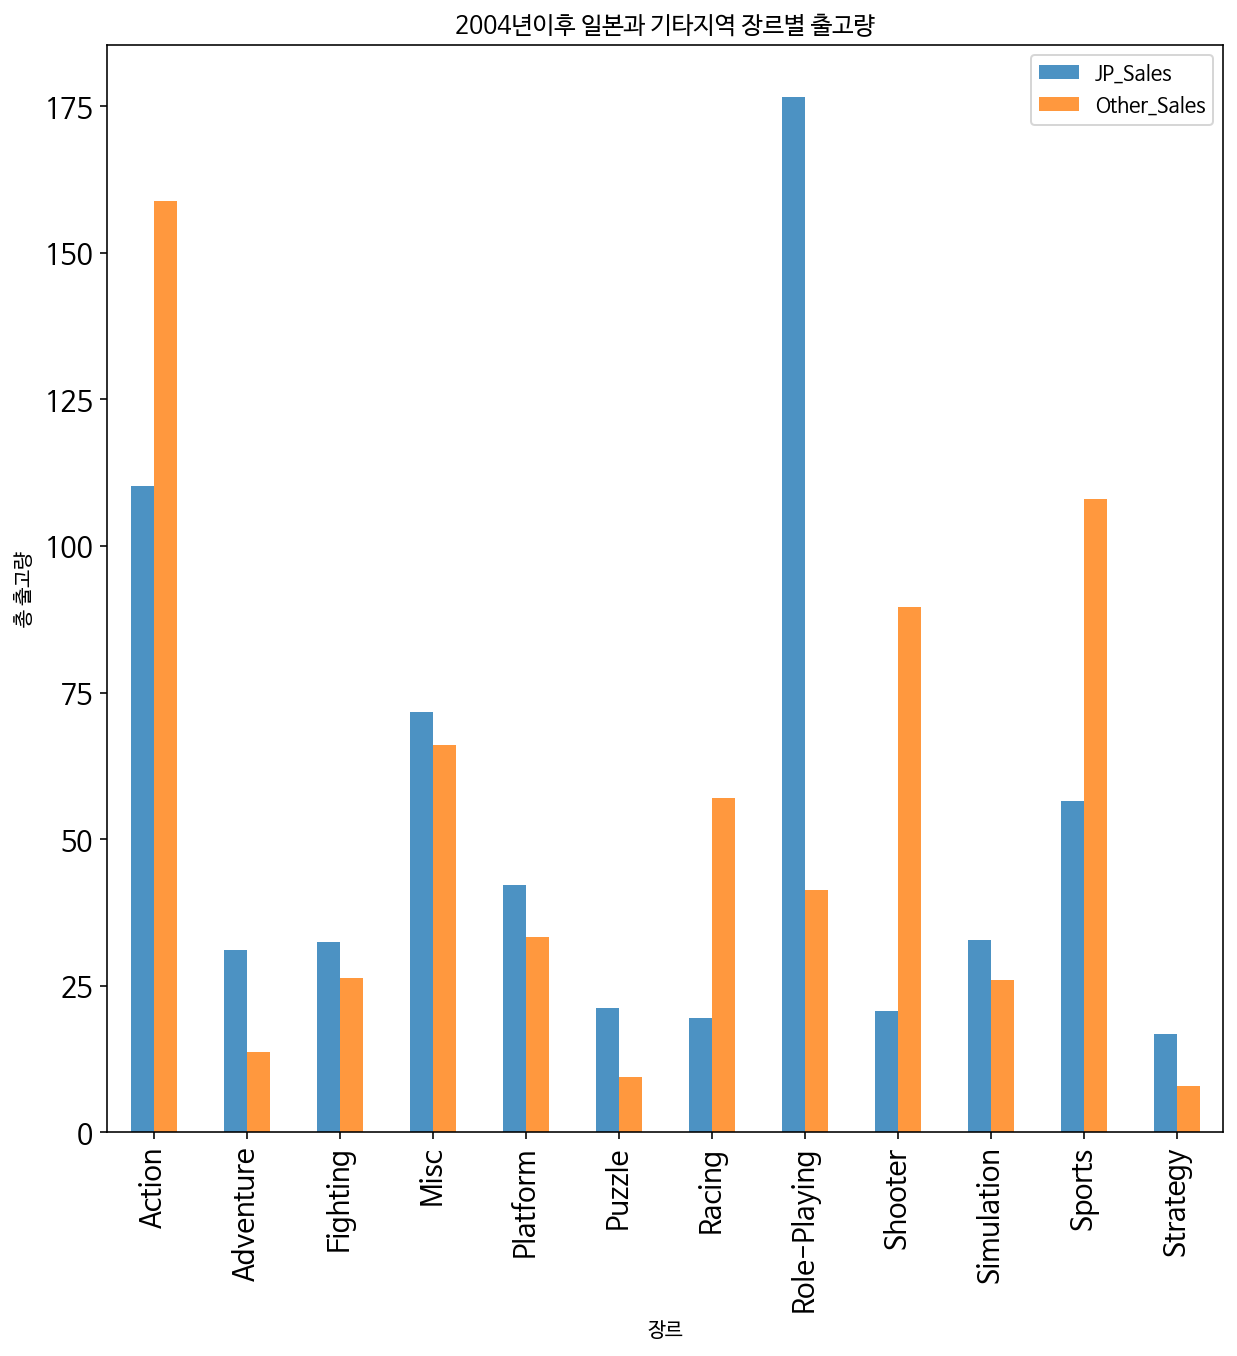

In [9]:
#2004년이후 일본과 기타지역 장르별 출고량
df_jp_ot = df2.copy()
df_jp_ot.drop(labels=['NA_Sales', 'EU_Sales'], axis=1, inplace=True)
df_jp_ot1 = df_jp_ot[(df_jp_ot['Year']>=2004)]
df_jp_ot1.drop(labels=['Year'], axis=1, inplace=True)
df_jp_ot2 = df_jp_ot1.groupby(['Genre']).sum()

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc('font', family='NanumBarunGothic') 
df_jp_ot2.plot(kind='bar', fontsize=14, alpha=0.8, figsize=(10,10), title='2004년이후 일본과 기타지역 장르별 출고량', 
                   xlabel='장르', ylabel='총 출고량');


## 2004년이후 일본과 기타지역 장르별 출고량  
   일본의 출고량  
   1위 Role-Playing, 2위 Action, 3위 Misc  
   기타지역의 출고량  
   1위 Action, 2위 Sports, 3위 Shooter  

# **출고량이 높은 게임에 대한 분석 및 시각화**

In [10]:
df_name = df2.copy()
df_name.drop(labels=['Year'], axis=1, inplace=True)
df_name['NameGenre'] = df_name['Name'] + '\n(' + df_name['Genre'] +')'
df_name.drop(labels=['Name', 'Genre'], axis=1, inplace=True)
df_name = df_name.groupby(['NameGenre']).sum()

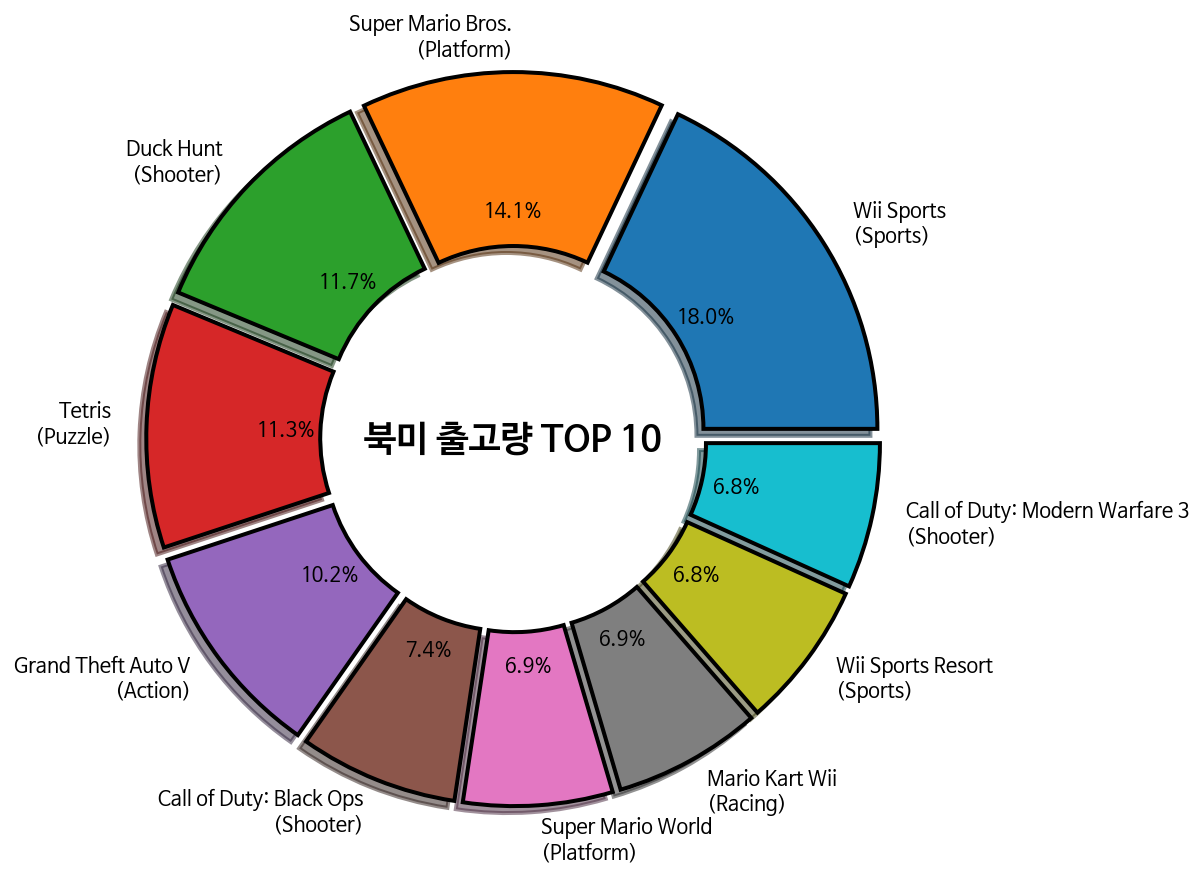

In [11]:
df_name_na = df_name.copy()
df_name_na.sort_values('NA_Sales', ascending=False, inplace=True)
df_name_na.drop(labels=['EU_Sales', 'JP_Sales','Other_Sales'], axis=1, inplace=True)
df_name_na = df_name_na.head(10)
df_name_na = df_name_na[['NA_Sales']].reset_index(drop=False)

explodes =(0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11)
wedgeprops={'width': 1, 'edgecolor': 'k', 'linewidth': 2}
plt.pie(df_name_na.NA_Sales, explode=explodes, labels=df_name_na.NameGenre, wedgeprops=wedgeprops, 
        autopct='%.1f%%', radius = 2, shadow=True)
plt.tick_params(labelsize=16)
title_font = {'fontsize': 18,  'fontweight': 'bold'}
plt.title('북미 출고량 TOP 10', fontdict=title_font, loc='center',  position=(0.5, 0+0.45))
plt.show()

## **북미지역 출고량 TOP10**
1위 Wii Sports(Sports)  
2위 Super Mario Bros.(Platform)  
3위 Duck Hunt(Shooter)  
4위 Tetris(Puzzle)  
5위 Grand Theft Auto V(Action)  

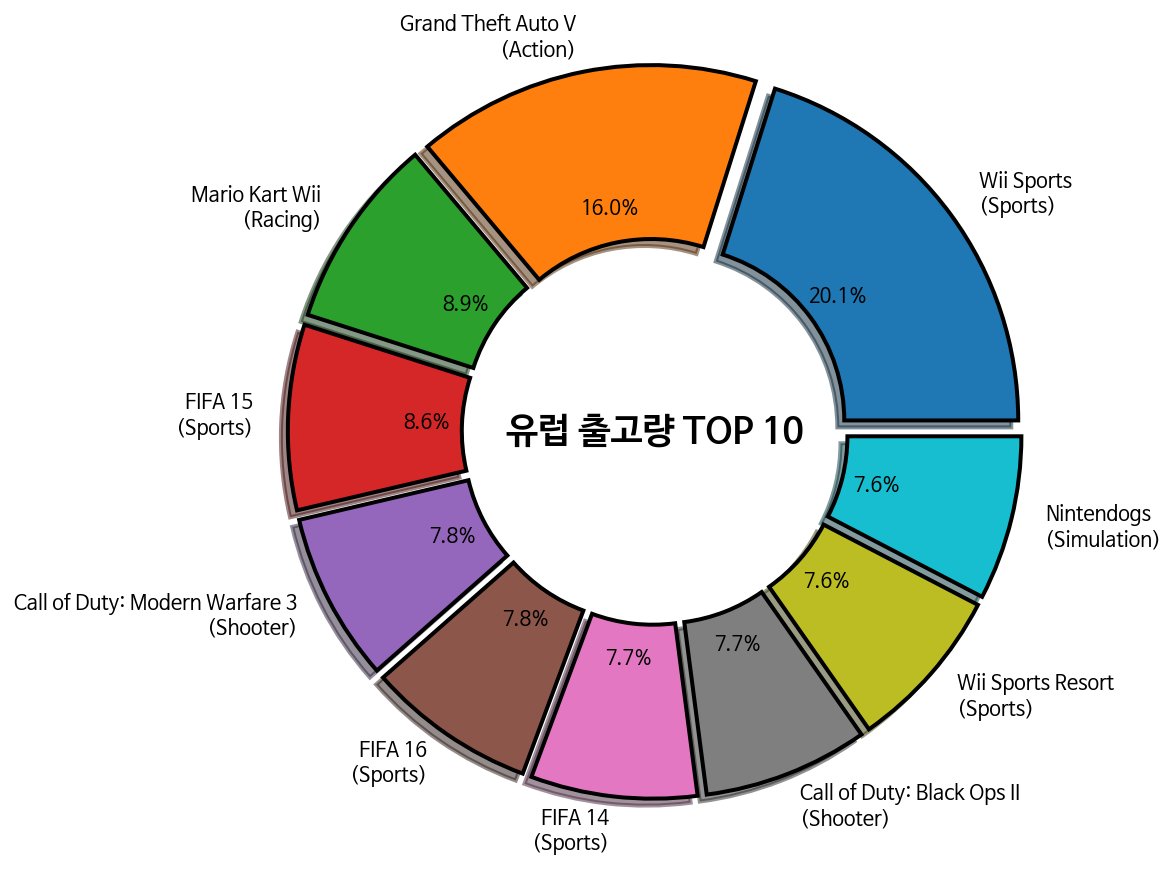

In [12]:
df_name_eu = df_name.copy()
df_name_eu.sort_values('EU_Sales', ascending=False, inplace=True)
df_name_eu.drop(labels=['NA_Sales', 'JP_Sales','Other_Sales'], axis=1, inplace=True)
df_name_eu = df_name_eu.head(10)
df_name_eu = df_name_eu[['EU_Sales']].reset_index(drop=False)

explodes =(0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11)
wedgeprops={'width': 1, 'edgecolor': 'k', 'linewidth': 2}
plt.pie(df_name_eu.EU_Sales, explode=explodes, labels=df_name_eu.NameGenre, wedgeprops=wedgeprops, 
        autopct='%.1f%%', radius = 2, shadow=True)
plt.tick_params(labelsize=16)
title_font = {'fontsize': 18,  'fontweight': 'bold'}
plt.title('유럽 출고량 TOP 10', fontdict=title_font, loc='center',  position=(0.5, 0+0.45))
plt.show()

## **유럽지역 출고량 TOP10**
1위 Wii Sports(Sports)  
2위 Grand Theft Auto V(Action)  
3위 Mario Kart Wii(Racing)  
4위 FIFA 15(Sports)  
5위 Call of Duty:Modern Warfare3(Shooter)  

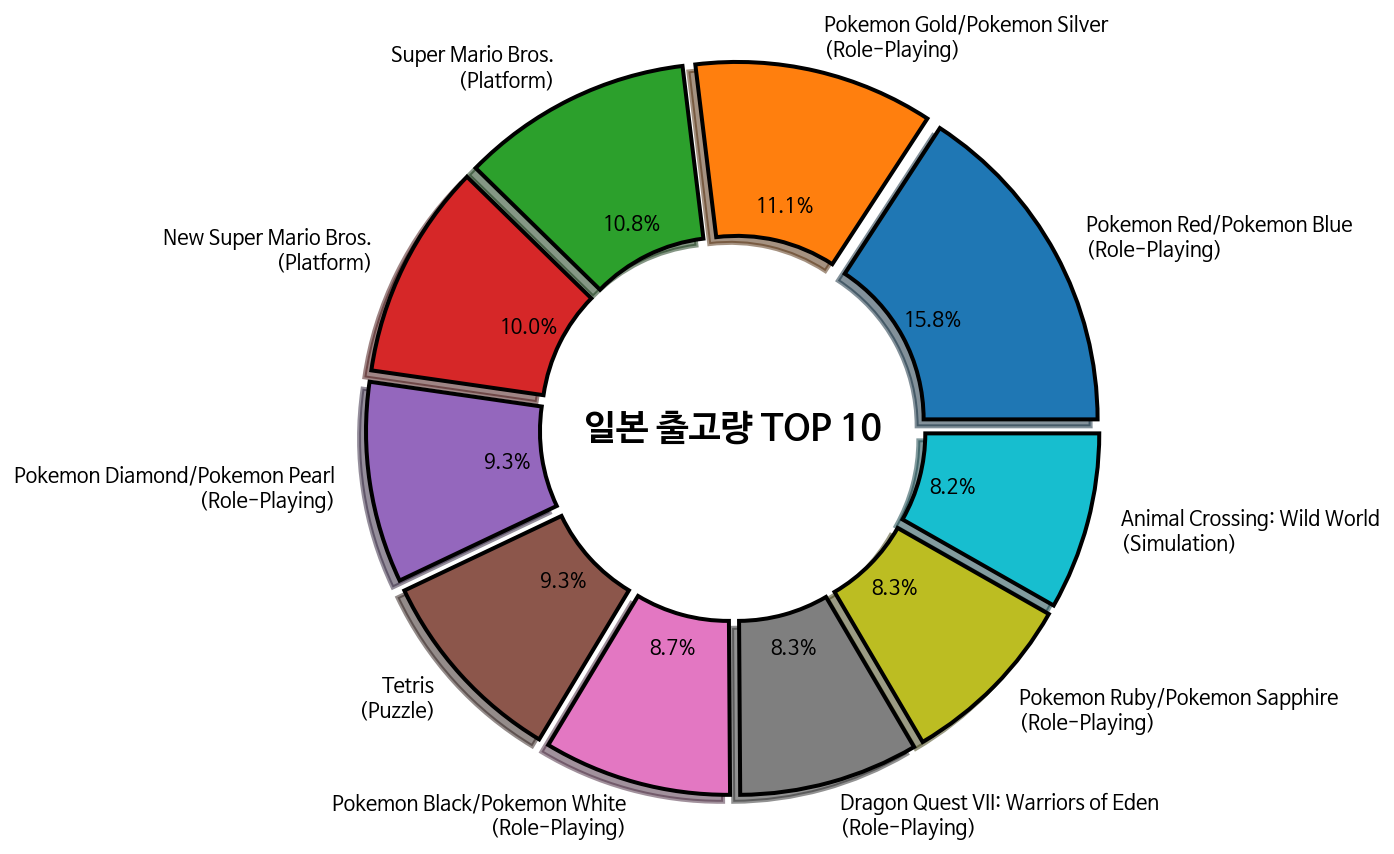

In [13]:
df_name_jp = df_name.copy()
df_name_jp.sort_values('JP_Sales', ascending=False, inplace=True)
df_name_jp.drop(labels=['NA_Sales', 'EU_Sales','Other_Sales'], axis=1, inplace=True)
df_name_jp = df_name_jp.head(10)
df_name_jp = df_name_jp[['JP_Sales']].reset_index(drop=False)

explodes =(0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11)
wedgeprops={'width': 1, 'edgecolor': 'k', 'linewidth': 2}
plt.pie(df_name_jp.JP_Sales, explode=explodes, labels=df_name_jp.NameGenre, wedgeprops=wedgeprops, 
        autopct='%.1f%%', radius = 2, shadow=True)
plt.tick_params(labelsize=16)
title_font = {'fontsize': 18,  'fontweight': 'bold'}
plt.title('일본 출고량 TOP 10', fontdict=title_font, loc='center',  position=(0.5, 0+0.45))
plt.show()

## **일본지역 출고량 TOP10**
1위 Pokemon Red/Pokemon Blue(Role-Playing)  
2위 Pokemon Gold/Pokemon Silver(Role-Playing)  
3위 Super Mario Bros.(Platform)  
4위 New Super Mario Bros.(Platform)  
5위 Pokemon Diamond/Pokemon Pearl(Role-Playing)  

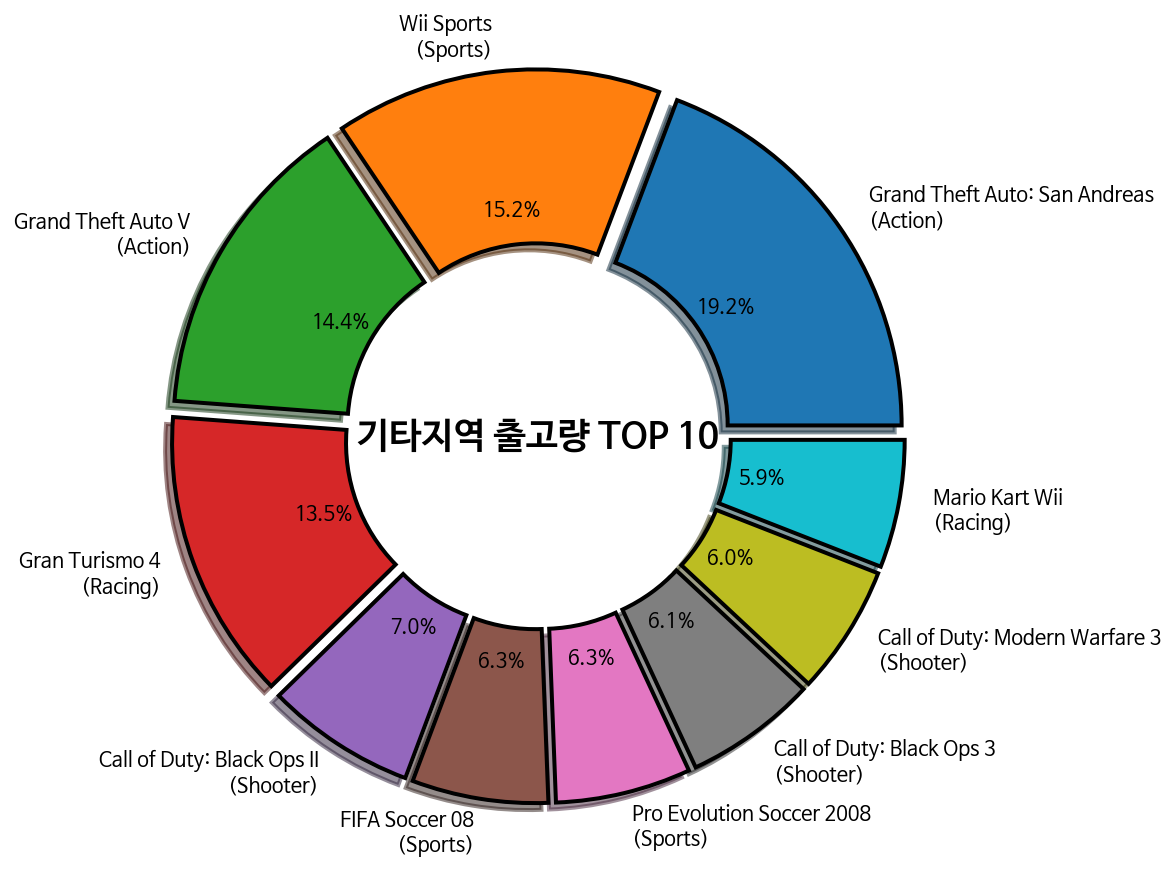

In [17]:
df_name_other = df_name.copy()
df_name_other.sort_values('Other_Sales', ascending=False, inplace=True)
df_name_other.drop(labels=['NA_Sales', 'EU_Sales','JP_Sales'], axis=1, inplace=True)
df_name_other = df_name_other.head(10)
df_name_other = df_name_other[['Other_Sales']].reset_index(drop=False)

explodes =(0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11)
wedgeprops={'width': 1, 'edgecolor': 'k', 'linewidth': 2}
plt.pie(df_name_other.Other_Sales, explode=explodes, labels=df_name_other.NameGenre, wedgeprops=wedgeprops, 
        autopct='%.1f%%', radius = 2, shadow=True)
plt.tick_params(labelsize=16)
title_font = {'fontsize': 18,  'fontweight': 'bold'}
plt.title('기타지역 출고량 TOP 10', fontdict=title_font, loc='center',  position=(0.5, 0+0.45))
plt.show()

## **기타지역 출고량 TOP10**
1위 Grand Theft Auto:San Adreas(Action)  
2위 Wii Sports(Sports)  
3위 Grand Theft Auto V(Action)  
4위 Gran Turismo 4(Racing)  
5위 Call of Duty:Black Ops II(Shooter)  

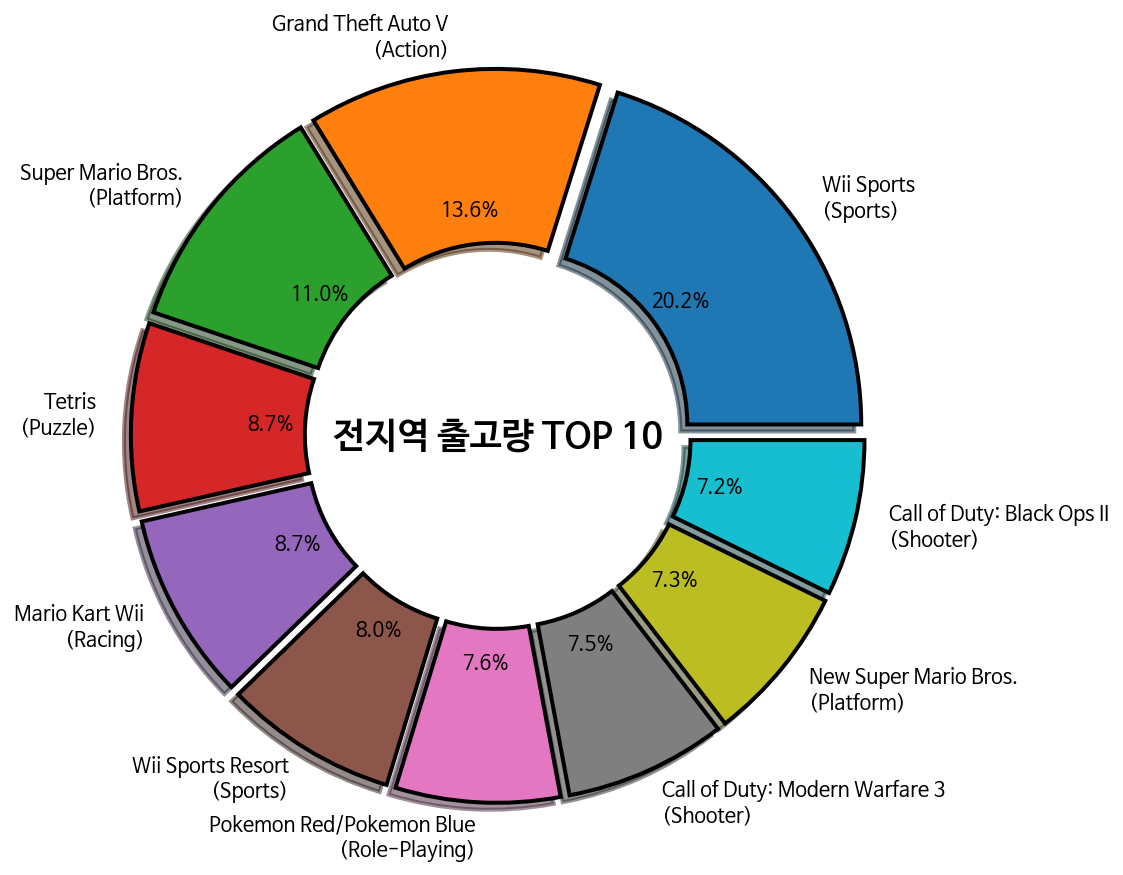

In [15]:
df_name_total = df_name.copy()
df_name_total
df_name_total['Total_Sales'] = df_name_total[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_name_total.sort_values('Total_Sales', ascending=False, inplace=True)
df_name_total.drop(labels=['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
df_name_total = df_name_total.head(10)
df_name_total = df_name_total[['Total_Sales']].reset_index(drop=False)

explodes =(0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11)
wedgeprops={'width': 1, 'edgecolor': 'k', 'linewidth': 2}
plt.pie(df_name_total.Total_Sales, explode=explodes, labels=df_name_total.NameGenre, wedgeprops=wedgeprops, 
        autopct='%.1f%%', radius = 2, shadow=True)
plt.tick_params(labelsize=16)
title_font = {'fontsize': 18,  'fontweight': 'bold'}
plt.title('전지역 출고량 TOP 10', fontdict=title_font, loc='center',  position=(0.5, 0+0.45))
plt.show()

## **전지역 출고량 TOP10**
1위 Wii Sports(Sports)  
2위 Grand Theft Auto V(Action)  
3위 Super Mario Bros.(platform)  
4위 Tetris(Puzzle)  
5위 Mario Kart Wii(Racing)  

# **다음 분기에 어떤 게임을 설계해야 할까**

## **지역에 따라서 선호하는 게임 장르**  
북미지역의 출고량이 다른지역의 출고량보다 높다.  
두번째로 유럽지역이 높다.  
Action, Sports, Shooter순으로 출고량이 높지만,  
일본지역에서만큼은 Role-Playing, Action, Sports, Platform순으로 출고량이 높다.  

## **연도별 게임의 트렌드**  
### 북미지역의 출고량은 압도적으로 높다.  
  
### 1997년을 기점으로 유럽(2위)과 일본(3위)의 순위가 바뀐다.  
1997년이후 유럽의 출고량 순위  
1위 Action, 2위 Sports, 3위 Shooter  
1997년이후 일본의 출고량 순위  
1위 Role-Playing, 2위, Action, 3위, Sports  
  
### 2004년을 기점으로 일본과 기타지역의 순위도 변동이 발생 된다.  

2004년이후 일본의 출고량 순위  
1위 Role-Playing, 2위 Action, 3위 Misc  
2004년이후 기타지역의 출고량 순위  
1위 Action, 2위 Sports, 3위 Shooter  

## **출고량이 높은 게임**   
전지역 출고량 TOP10  
1위 Wii Sports(Sports)  
2위 Grand Theft Auto V(Action)  
3위 Super Mario Bros.(platform)  
4위 Tetris(Puzzle)  
5위 Mario Kart Wii(Racing)  

# **결론**  
  
전세계적으로 Action, Sports, Shooter의 판매량이 높아 수요가 많을 것으로 확인되어 고려해볼 장르이다.  
단, 일본에서는 Role-Playing, Platform 장르도 고려대상이다.  
북미시장이 압도적으로 높고 유럽, 일본, 기타지역순이며, 게임의 트렌드는 Action과 Sports가 대세임이 확인 되었다.  
  
